In [1]:
import numpy as np
import pandas as pd
from scipy.stats import kendalltau
import networkx as nx
import matplotlib.pyplot as plt

# 1

## a

Text(0.5, 1.0, 'Sieć Erdős-Rényi (N=100, p=0.05)')

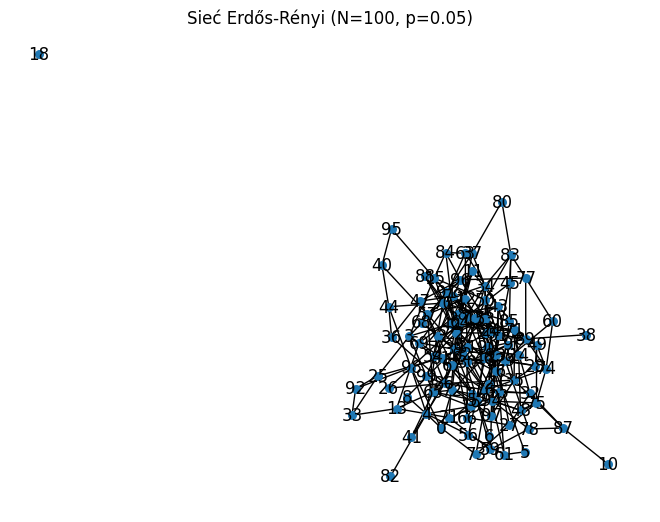

In [2]:


N = 100 
p = 0.05 

G = nx.erdos_renyi_graph(N, p)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=30)
plt.title("Sieć Erdős-Rényi (N=100, p=0.05)")

## b

In [3]:
nodes = list(G.nodes())
print("Wierzchołki:", nodes)

edges = list(G.edges())
print("Krawędzie:", edges)


Wierzchołki: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Krawędzie: [(0, 4), (0, 72), (0, 73), (0, 76), (0, 98), (1, 39), (1, 48), (1, 55), (1, 72), (1, 81), (2, 24), (2, 31), (2, 51), (2, 73), (3, 15), (3, 25), (3, 42), (3, 54), (3, 68), (3, 81), (3, 99), (4, 8), (4, 19), (4, 23), (4, 56), (4, 67), (4, 82), (4, 98), (5, 16), (5, 61), (6, 59), (6, 62), (7, 15), (7, 17), (7, 29), (7, 34), (7, 39), (7, 45), (7, 46), (7, 79), (7, 98), (8, 39), (9, 16), (9, 30), (9, 46), (9, 53), (10, 87), (11, 12), (11, 42), (11, 43), (11, 58), (12, 20), (12, 22), (12, 31), (12, 42), (12, 57), (12, 63), (12, 90), (13, 21), (13, 33), (13, 65), (13, 69), (14, 31), (1

## c

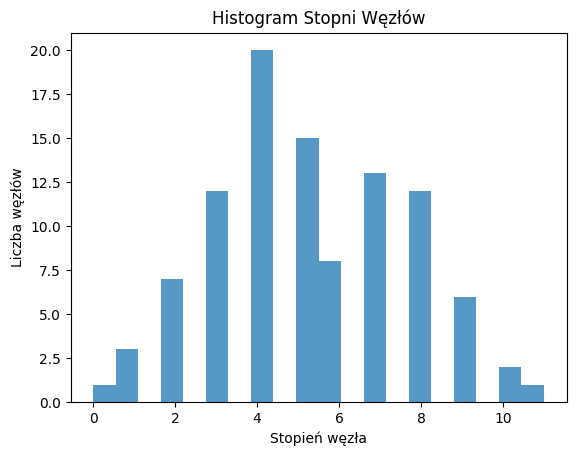

In [4]:
degrees = dict(G.degree())
degree_values = list(degrees.values())
plt.hist(degree_values, bins=20, alpha=0.75)
plt.title("Histogram Stopni Węzłów")
plt.xlabel("Stopień węzła")
plt.ylabel("Liczba węzłów")
plt.show()

## d

In [5]:
connected_components = nx.number_connected_components(G)
print(f"Liczba komponentów połączonych: {connected_components}")

Liczba komponentów połączonych: 2


## e

c:\Users\krzys\anaconda3\envs\SZ\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


Text(0.5, 1.0, 'Graf z rozmiarem węzłów odpowiadającym PageRank')

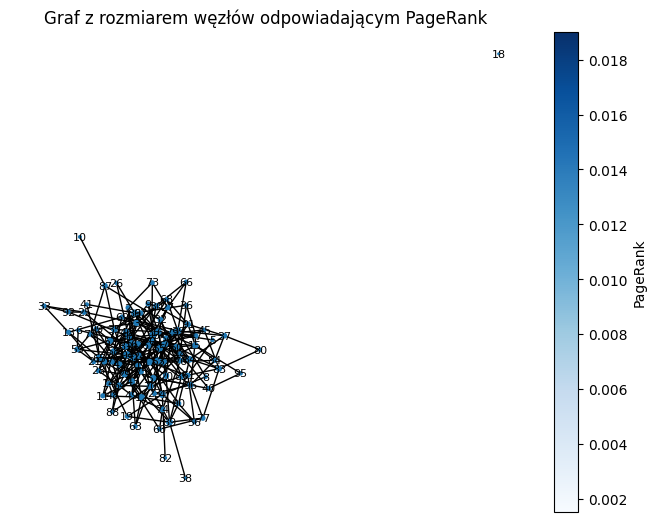

In [6]:
pagerank_values = nx.pagerank(G)

node_sizes = [pagerank_values[node] * 1000 for node in G.nodes()]

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=node_sizes, cmap=plt.cm.Blues, font_size=8, font_color='black')

sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(pagerank_values.values()), vmax=max(pagerank_values.values())))
sm._A = []
plt.colorbar(sm, label='PageRank', ax = plt.gca())

plt.title("Graf z rozmiarem węzłów odpowiadającym PageRank")


# 2

## a

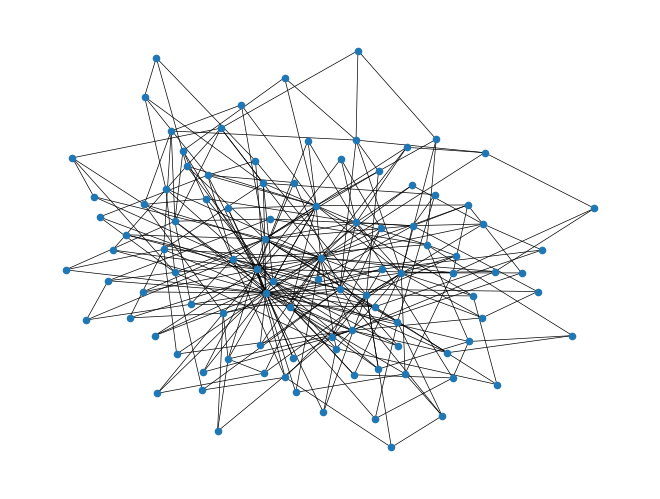

In [7]:
N = 100 
m0 = 3    
m = 3     
G = nx.barabasi_albert_graph(N, m)
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=False, node_size=20, width = 0.5)

# b

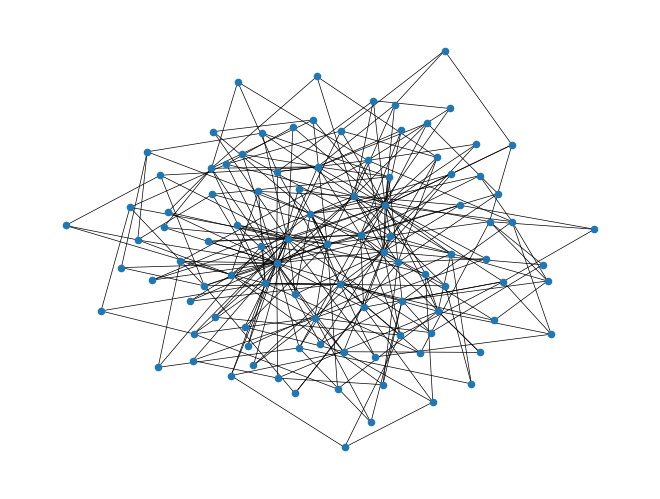

In [8]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=False, node_size=20, width = 0.5)

# c

In [9]:
betweenness_centrality = nx.betweenness_centrality(G)
most_central_node = max(betweenness_centrality, key=betweenness_centrality.get)
print(f"Najbardziej centralny węzeł według betweenness centrality: {most_central_node}, betweenness centrality: {betweenness_centrality[most_central_node]}")

Najbardziej centralny węzeł według betweenness centrality: 4, betweenness centrality: 0.266942049786843


# d

In [10]:
diameter = nx.diameter(G)
print(f"Średnica grafu: {diameter}")

Średnica grafu: 5


# e Różnice
Modele grafów Barabási-Albert i Erdős-Rényi różnią się w sposobie tworzenia krawędzi między węzłami. BA opiera się na preferencyjnym dołączaniu, co prowadzi do powstawania "hubów" o wysokim stopniu, podczas gdy ER generuje losowe połączenia, co skutkuje bardziej równomiernym rozkładem stopni węzłów. W rezultacie sieci BA są skupione wokół nielicznych "hubów" i charakteryzują się krótkimi ścieżkami, podczas gdy sieci ER są bardziej jednostajne i mają większą średnicę.







# 3

# a

In [11]:
df = pd.read_csv('out.csv', sep = ' ', header = 2).iloc[:, :2]

In [12]:
df.loc[-1] = 1,2
df = df.sort_index().reset_index(drop = True)
df.rename( columns={'1': 'col1', '2':'col2'}, inplace = True)

In [13]:
df

,col1,col2
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6
...,...,...
82922,3,39
82923,3,39
82924,19,18
82925,85,3


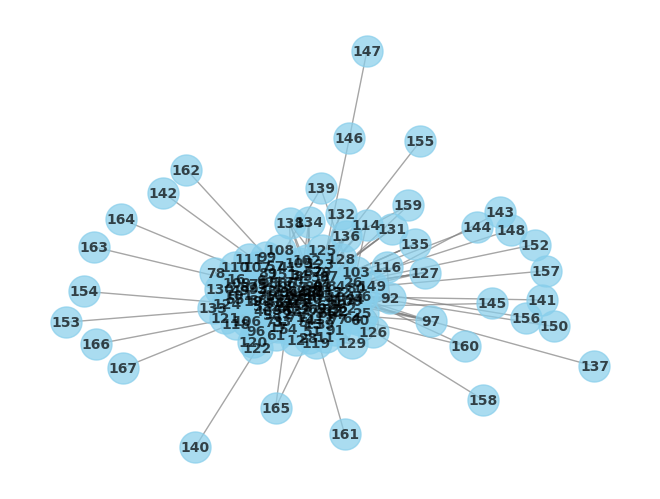

In [14]:
G = nx.from_pandas_edgelist(df, 'col1', 'col2', create_using=nx.Graph())
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray', linewidths=1, alpha=0.7)

# b

Liczba wierzchołków przed: 167
Liczba krawędzi przed: 3251
Liczba wierzchołków po: 167
Liczba krawędzi po: 3250


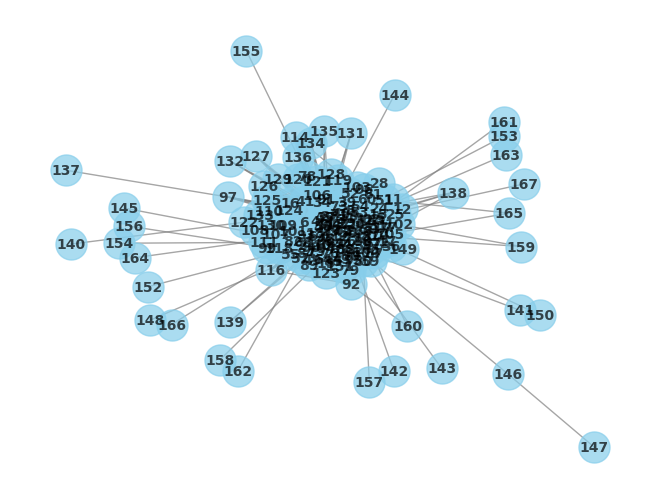

In [15]:
print("Liczba wierzchołków przed:", G.number_of_nodes())
print("Liczba krawędzi przed:", G.number_of_edges())
G.remove_edges_from(nx.selfloop_edges(G, data=True))
G = nx.Graph(G)  
print("Liczba wierzchołków po:", G.number_of_nodes())
print("Liczba krawędzi po:", G.number_of_edges())
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray', linewidths=1, alpha=0.7)

# c

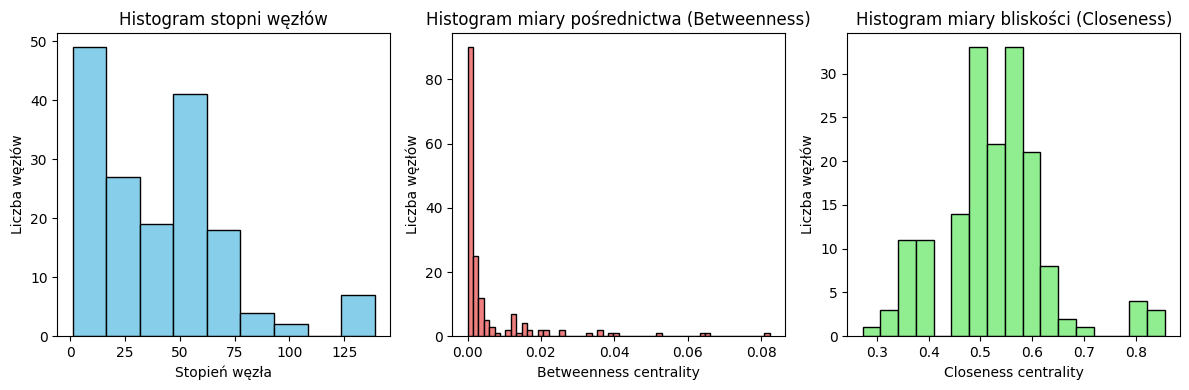

Zgodność rankingów Betweenness i Closeness (miara Kendall tau): 0.7839475424697699


In [16]:
stopnie = dict(G.degree())

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(list(stopnie.values()), bins='auto', color='skyblue', edgecolor='black')
plt.title('Histogram stopni węzłów')
plt.xlabel('Stopień węzła')
plt.ylabel('Liczba węzłów')

betweenness_centrality = nx.betweenness_centrality(G)

plt.subplot(132)
plt.hist(list(betweenness_centrality.values()), bins='auto', color='lightcoral', edgecolor='black')
plt.title('Histogram miary pośrednictwa (Betweenness)')
plt.xlabel('Betweenness centrality')
plt.ylabel('Liczba węzłów')

closeness_centrality = nx.closeness_centrality(G)

plt.subplot(133)
plt.hist(list(closeness_centrality.values()), bins='auto', color='lightgreen', edgecolor='black')
plt.title('Histogram miary bliskości (Closeness)')
plt.xlabel('Closeness centrality')
plt.ylabel('Liczba węzłów')

plt.tight_layout()
plt.show()

kendall_tau_betweenness_closeness = kendalltau(list(betweenness_centrality.values()), list(closeness_centrality.values())).correlation

print(f"Zgodność rankingów Betweenness i Closeness (miara Kendall tau): {kendall_tau_betweenness_closeness}")

# d

In [17]:
connected_components = list(nx.connected_components(G))
print(f"Liczba komponentów połączonych: {len(connected_components)}")
print("Wierzchołki w każdym z komponentów:")
for i, component in enumerate(connected_components, start=1):
    print(f"Komponent {i}: {component}")

Liczba komponentów połączonych: 1
Wierzchołki w każdym z komponentów:
Komponent 1: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167}


# e

In [18]:
diameter = nx.diameter(G)
average_path_length = nx.average_shortest_path_length(G)
print(f"Średnica grafu: {diameter}")
print(f"Średnia długość ścieżki: {average_path_length}")

Średnica grafu: 5
Średnia długość ścieżki: 1.9673905201644903


# f

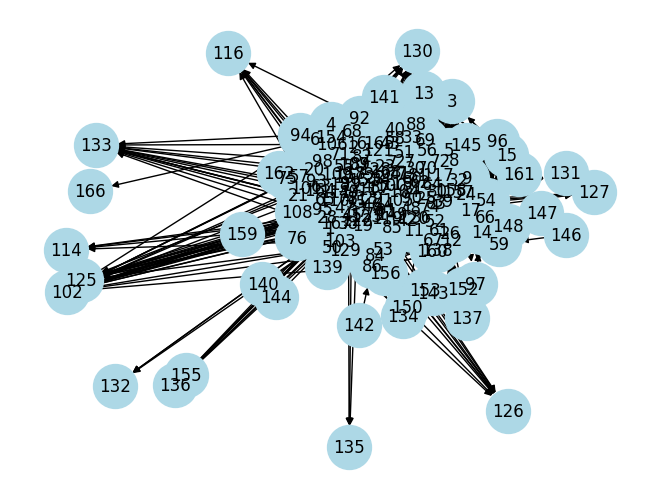

In [20]:
G = nx.DiGraph()
sender_counts = df['col1'].value_counts()
for sender, recipient in zip(df['col1'], df['col2']):
    weight = 1 / sender_counts[sender]  
    G.add_edge(sender, recipient, weight=weight)
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1000, arrows=True)

# g

In [23]:
is_connected = nx.is_strongly_connected(G)
if is_connected:
    print("Można dostać się z każdego wierzchołka do każdego innego")
else:
    print("Nie można dostać się z każdego wierzchołka do każdego innego")

Nie można dostać się z każdego wierzchołka do każdego innego
